This ipython Notebook contains implementation of PCA using Numpy. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Loading data and splitting it into labels and data.
"""This data set conatins images related to 40 people. Each person has 10 images. First 10 images belong
 to first person, second ten images belong to second person and so on.
"""

X = np.loadtxt(open("face_data.csv", "rb"), delimiter=",", skiprows=1)
data = X[:,0:4096]
labels = X[:, 4096]

Plotting one image for each person.

In [103]:
"""
This function plots the data. It is Specifically written for this dataset. 
It plots first image of each person.
"""
def plot(data):
    f, axarr = plt.subplots(7,7, figsize=(15,15))
    num_of_persons = int(data.shape[0]/10)
    for i in range(num_of_persons):
        row = int(i/7)
        column = int(i % 7)
        axarr[row,column].imshow(data[i*10].reshape((64,-1)))
    plt.show()

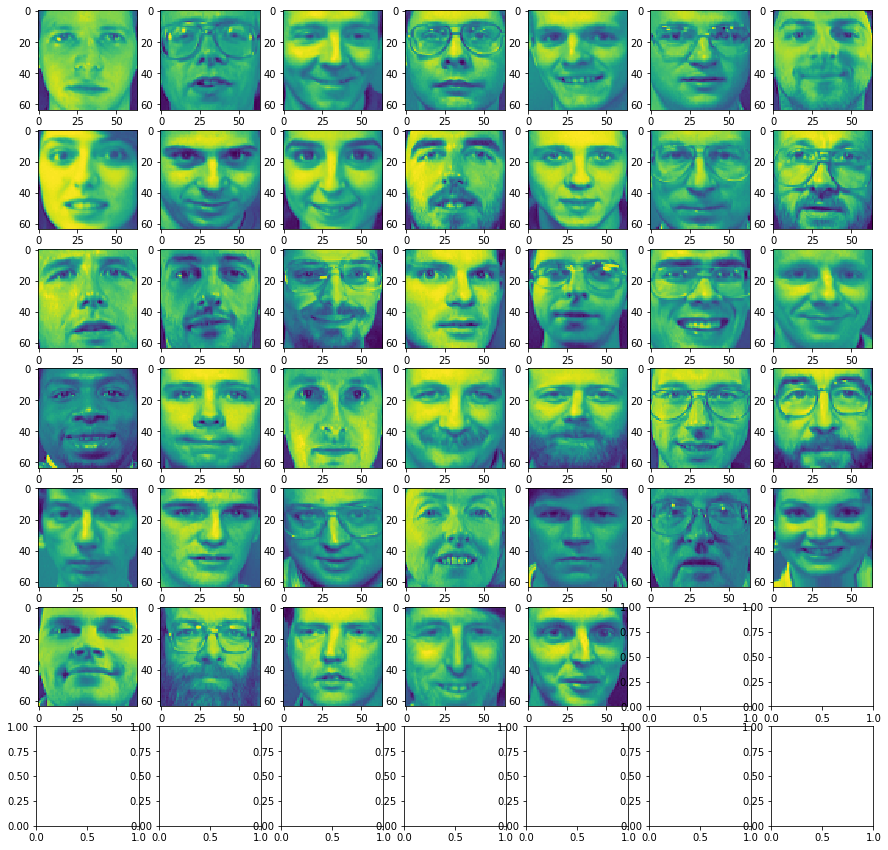

In [202]:
plot(data)

In [168]:
"""
As, we know eigen vectors of covariance matrix are the pricipal components of the data. Covariance of two variables is
sum over all the rows (Xi - u) * (Yi - m)/std(X) * std(Y) and dividing by number of rows
(u and m are mean of X and Y columns).. To make this covariance computation easy, we make each column zero mean
and unit variance. Thus making X.T.X as the covariance matrix.
"""
# Making mean zero and unit variance for the matrix
mean_data = data - (data.sum(axis=0)/data.shape[0])
variance = np.square(mean_data)
variance = variance.sum(axis=0)
variance /=data.shape[0]
variance = np.sqrt(variance)
covariance = mean_data/variance
# covariance = np.transpose(covariance).dot(covariance)
covariance = covariance.T.dot(covariance)
covariance /= data.shape[0]
covariance

array([[ 1.        ,  0.9432174 ,  0.81486848, ..., -0.18530692,
        -0.18118209, -0.14321256],
       [ 0.9432174 ,  1.        ,  0.92443031, ..., -0.2513405 ,
        -0.24345313, -0.19747634],
       [ 0.81486848,  0.92443031,  1.        , ..., -0.3332097 ,
        -0.3170726 , -0.26976897],
       ...,
       [-0.18530692, -0.2513405 , -0.3332097 , ...,  1.        ,
         0.91151486,  0.82629682],
       [-0.18118209, -0.24345313, -0.3170726 , ...,  0.91151486,
         1.        ,  0.9439202 ],
       [-0.14321256, -0.19747634, -0.26976897, ...,  0.82629682,
         0.9439202 ,  1.        ]])

    Eigen Vector Decomposition. Using Numpy functions to find Eigen values and Eigen vectors.
    Numpy provides two functions one is np.linalg.eig, which is a more general function in the sense, it computes
    Eigen vectors for any square matrix and slow. np.linalg.eigh assumes matrix is Square symmetric matrix and
    fast. np.linalg.eigh returns eigen values in ascending order and eigen vectors in the same order.

In [170]:
ev , eig = np.linalg.eigh(covariance)
ev

array([-1.53861774e-13, -1.35634476e-13, -1.20805170e-13, ...,
        3.21183971e+02,  5.05543736e+02,  1.10085933e+03])

In [171]:
eig[0]

array([ 0.        ,  0.        ,  0.        , ..., -0.00096616,
        0.02209019,  0.00332091])

Below is the main and tricky part of this entire notebook. Took a while for me to come up.
Initially I got confused computation of data_proj to be a Matrix multiplication between Eigen Vectors(A) and X.
A*X gives, when the basis vectors are moved to columns of A, where does X land. Which means that we are rotating 
the basis vectors and thus rotating the X. But, PCA is different. We dont want to move X, we just want to change 
basis vectors such that the projections of X on these new basis vectors can be explained in a better way.
We know that(Thats to Prof. Mithesh's DL course) if basis vectors are orthonormal, the projection of vector
on a basis vector is equal to dot product between vector and the basis

For Example: 3i+4j be the vector in i, j plane. Now, projection of vector in i axis is equal to dot product between
vector and i which is 3. If we plot this, we can easily see that, projection is equal to length of vector times 
cosine of angle between them. Which is equal to dot product. 

The main point is we dont move the X vector, instead we find some other vectors and represent X interms of 
linear combination of these new vectors. 

new projections = X.dot(basis vectors)

let u1 and u2 be the new basis vectors and a1 and a2 be the projections of X on u1 and u2


X = a1*u1 + a2*u2

Now, if we dont consider u2,

X = a1*u1

Here we are leaving some dimensions, thus acting as dimensionality reduction algorithm.

16 can be written as 2 * 8 or 4 * 4, lets say 8 and 4 are basis vectors, we have to use different linear combination
top express 16

(400, 96)


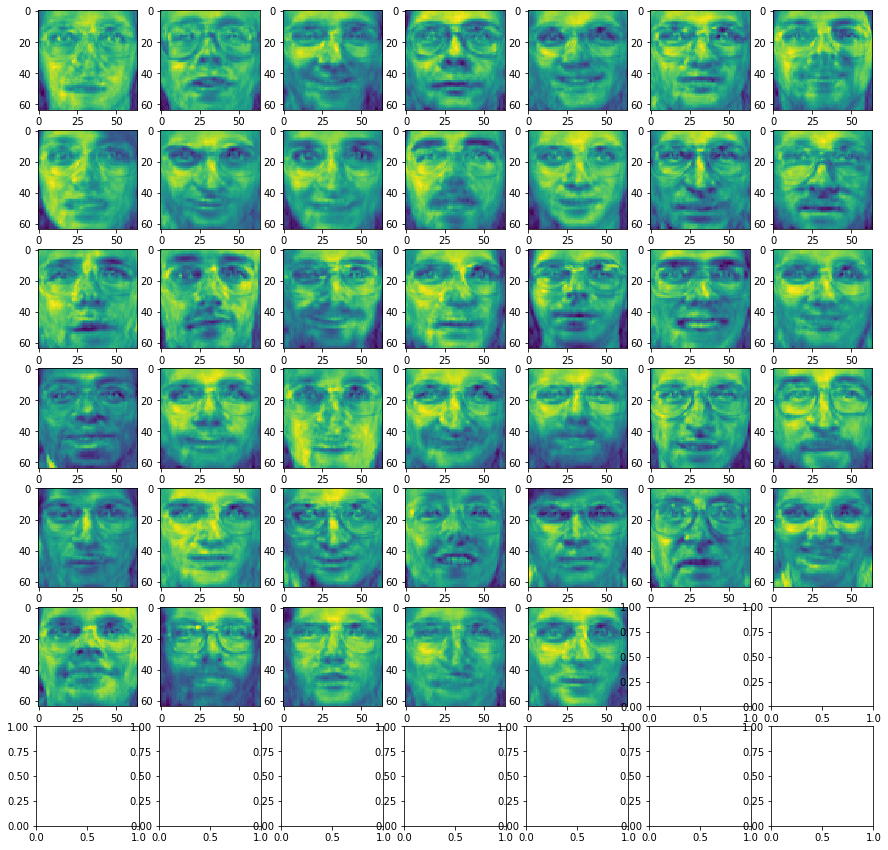

In [204]:
start_index = 4000
# data_proj are the projections of X on new dimensions.
data_proj = data.dot(eig[:, start_index:])
print(data_proj.shape)                                                     
plot(data_proj.dot(eig[:, start_index:].T))

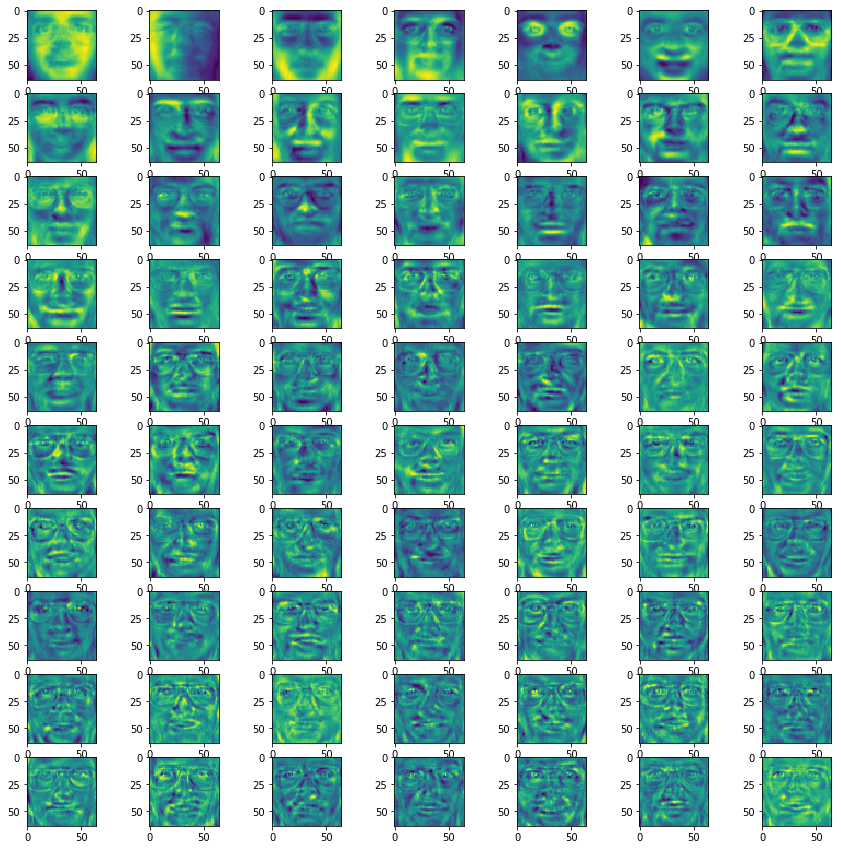

In [210]:
# Plotting Eigen Vectors.
num_of_eigenvectors = eig.shape[1]
num_of_eigenvectors_to_be_plotted = 70
f, axarr = plt.subplots(10,7,figsize=(15,15))
num_of_persons = int(data.shape[0]/10)
for i in range(num_of_eigenvectors_to_be_plotted):
    row = int(i/7)
    column = int(i % 7)
    data = eig[:, num_of_eigenvectors - i - 1]
    axarr[row,column].imshow(data.reshape((64,-1)))
plt.show()


References
1. Data is taken from https://github.com/daradecic/Python-Eigenfaces
2. https://www.cse.iitm.ac.in/~miteshk/CS7015.html